In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import classification_report, silhouette_score
%matplotlib inline

In [33]:
X,y=load_breast_cancer(return_X_y=True)

In [34]:
km=KMeans(n_clusters=2)

In [35]:
km.fit??

Signature: km.fit(X, y=None, sample_weight=None)
Source:   
    @_fit_context(prefer_skip_nested_validation=True)
    def fit(self, X, y=None, sample_weight=None):
        """Compute k-means clustering.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training instances to cluster. It must be noted that the data
            will be converted to C ordering, which will cause a memory
            copy if the given data is not C-contiguous.
            If a sparse matrix is passed, a copy will be made if it's not in
            CSR format.

        y : Ignored
            Not used, present here for API consistency by convention.

        sample_weight : array-like of shape (n_samples,), default=None
            The weights for each observation in X. If None, all observations
            are assigned equal weight. `sample_weight` is not used during
            initialization if `init` is a callable or a user provided

In [36]:
pr=km.fit_predict(X)

print(classification_report(y,pr))

In [37]:
km.inertia_??

Type:        float
String form: 77943099.87829885
Docstring:   Convert a string or number to a floating point number, if possible.

In [38]:
km.score(X)

-77943099.87829885

In [39]:
silhouette_score(X,pr)

np.float64(0.6972646156059464)

For n_clusters = 2 The average silhouette_score is : 0.6972646156059464
For n_clusters = 3 The average silhouette_score is : 0.5471360437420352
For n_clusters = 4 The average silhouette_score is : 0.5334614737117133
For n_clusters = 5 The average silhouette_score is : 0.5071395181003269
For n_clusters = 6 The average silhouette_score is : 0.4680910789309596
For n_clusters = 7 The average silhouette_score is : 0.4686322822503446
For n_clusters = 8 The average silhouette_score is : 0.4693582021719514
For n_clusters = 9 The average silhouette_score is : 0.47248202490069785
For n_clusters = 10 The average silhouette_score is : 0.4567493288901845
For n_clusters = 11 The average silhouette_score is : 0.4404530218363212


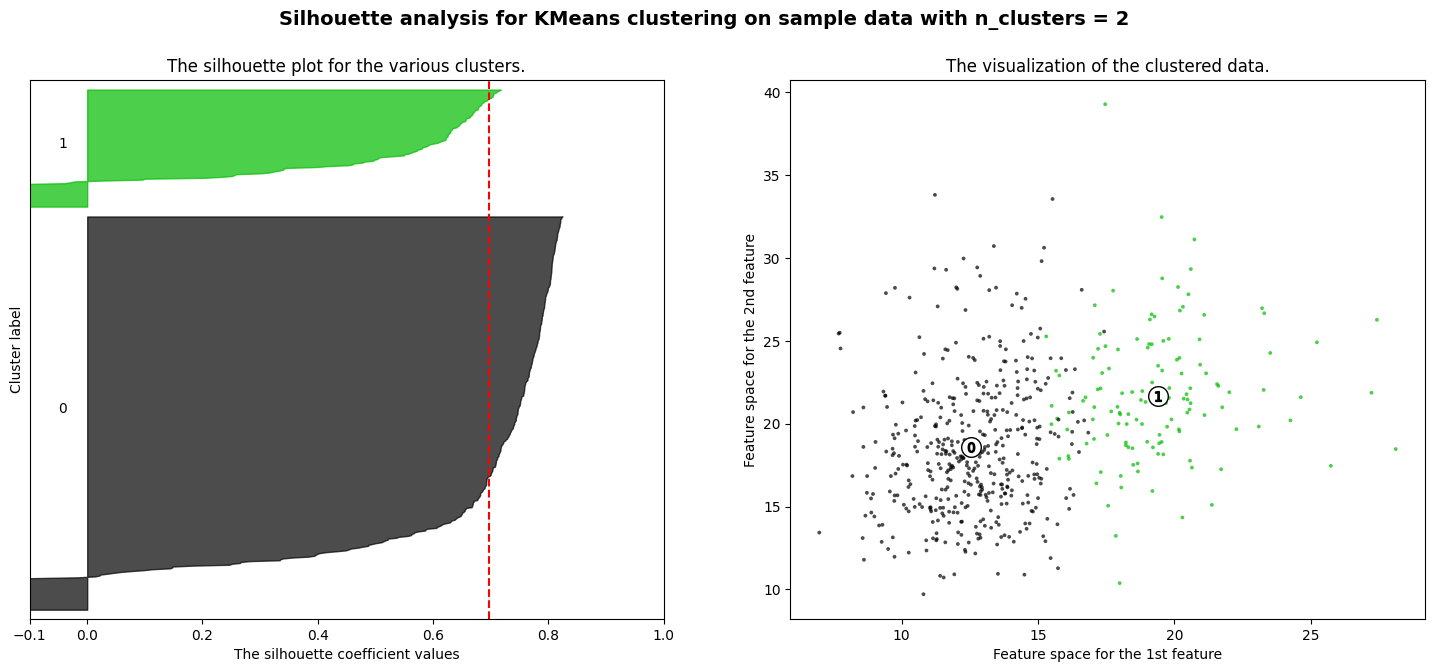

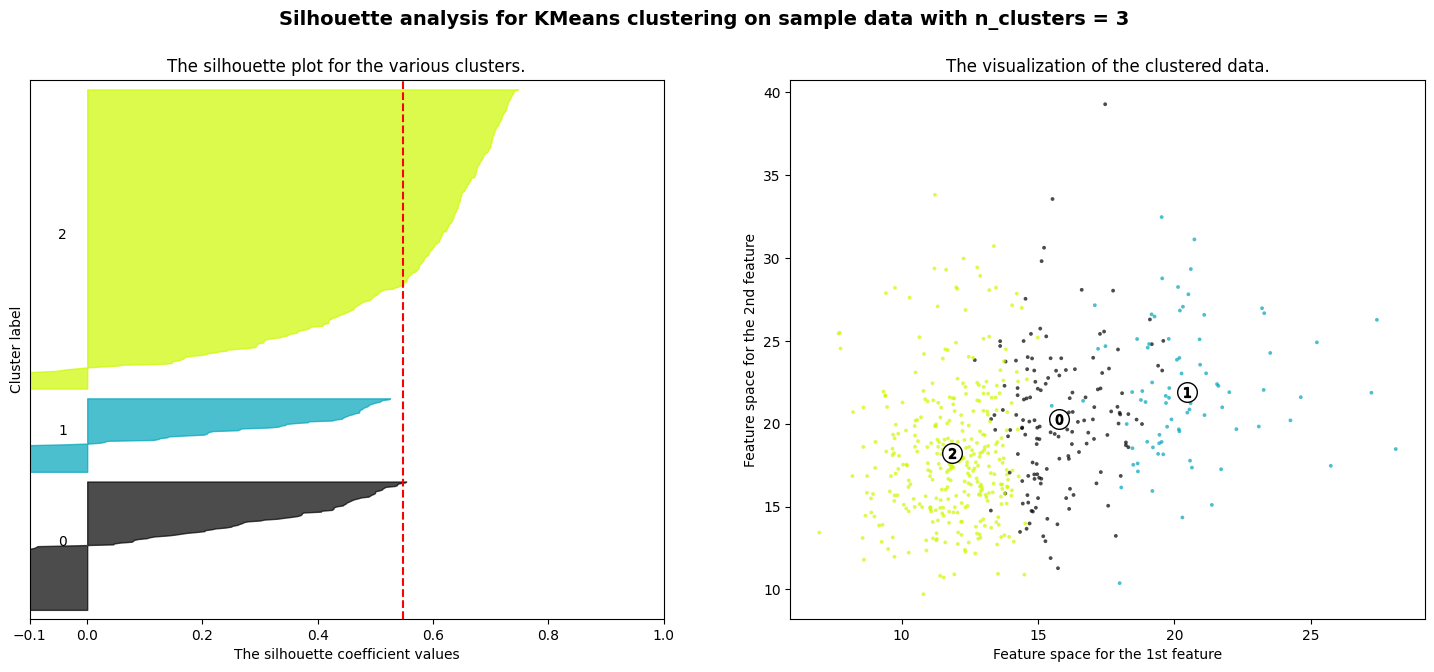

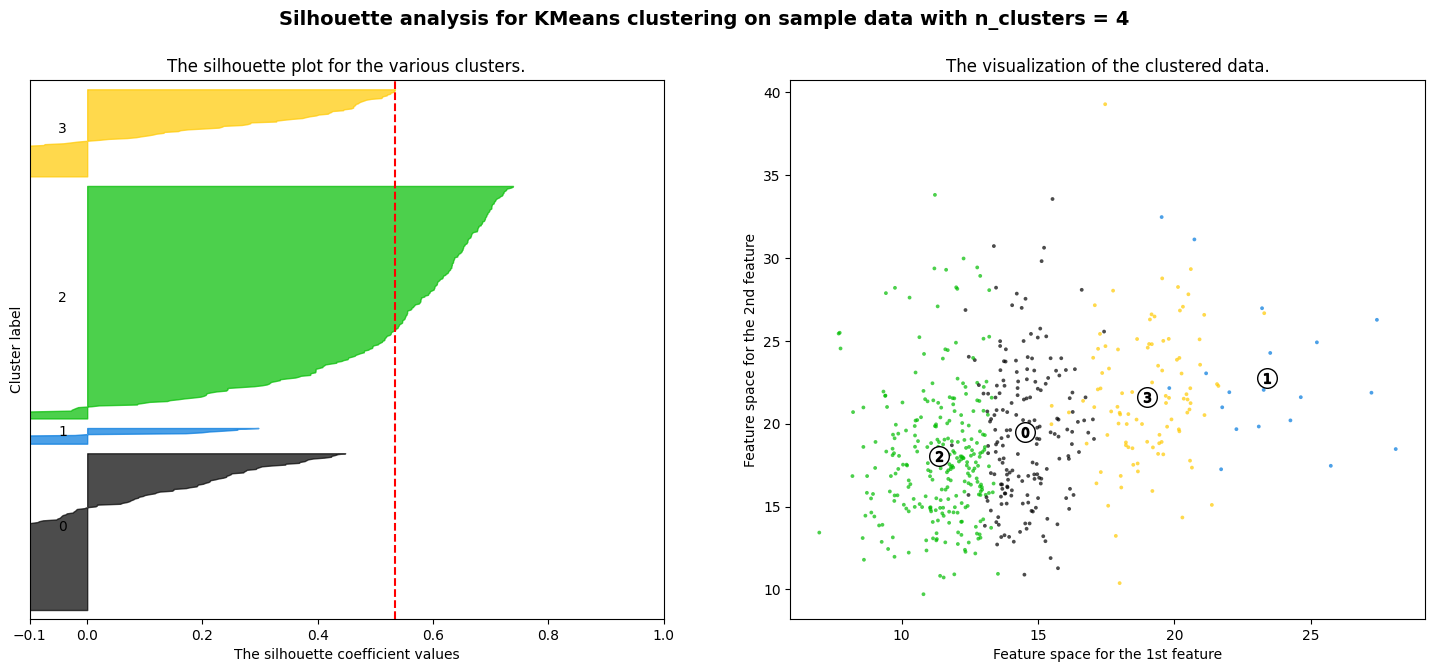

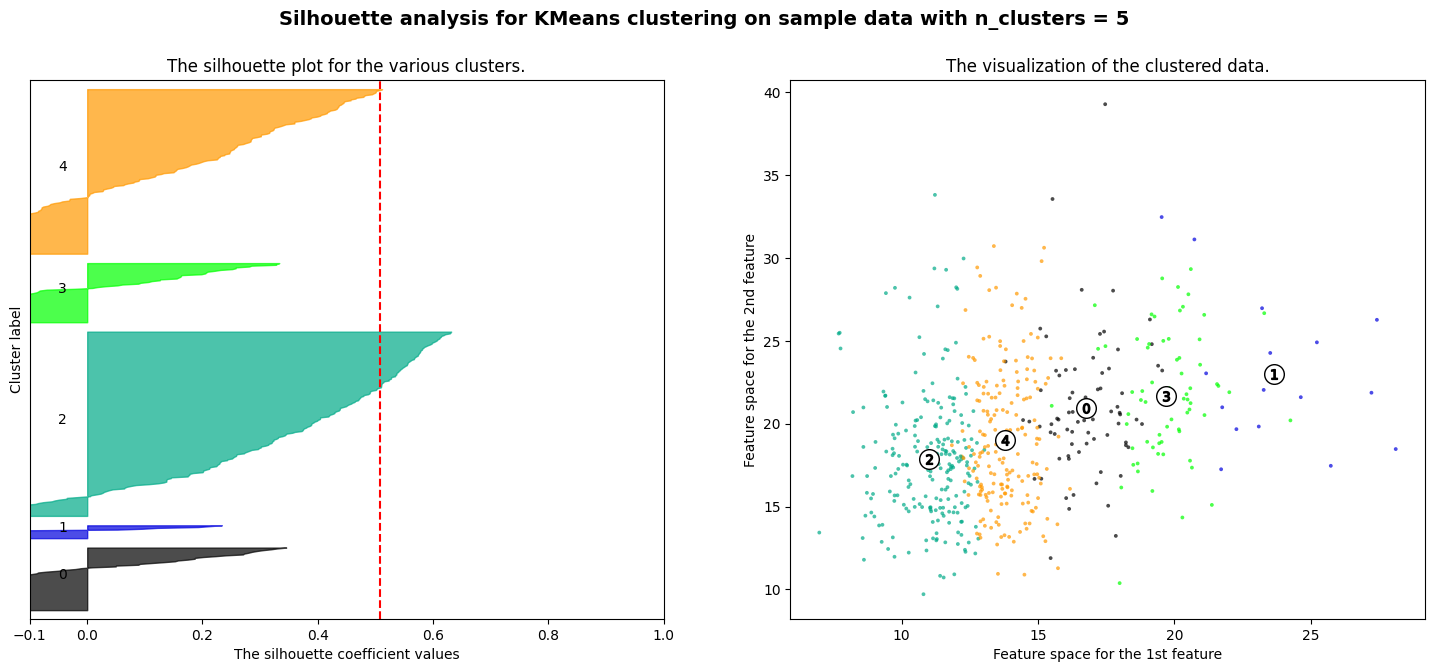

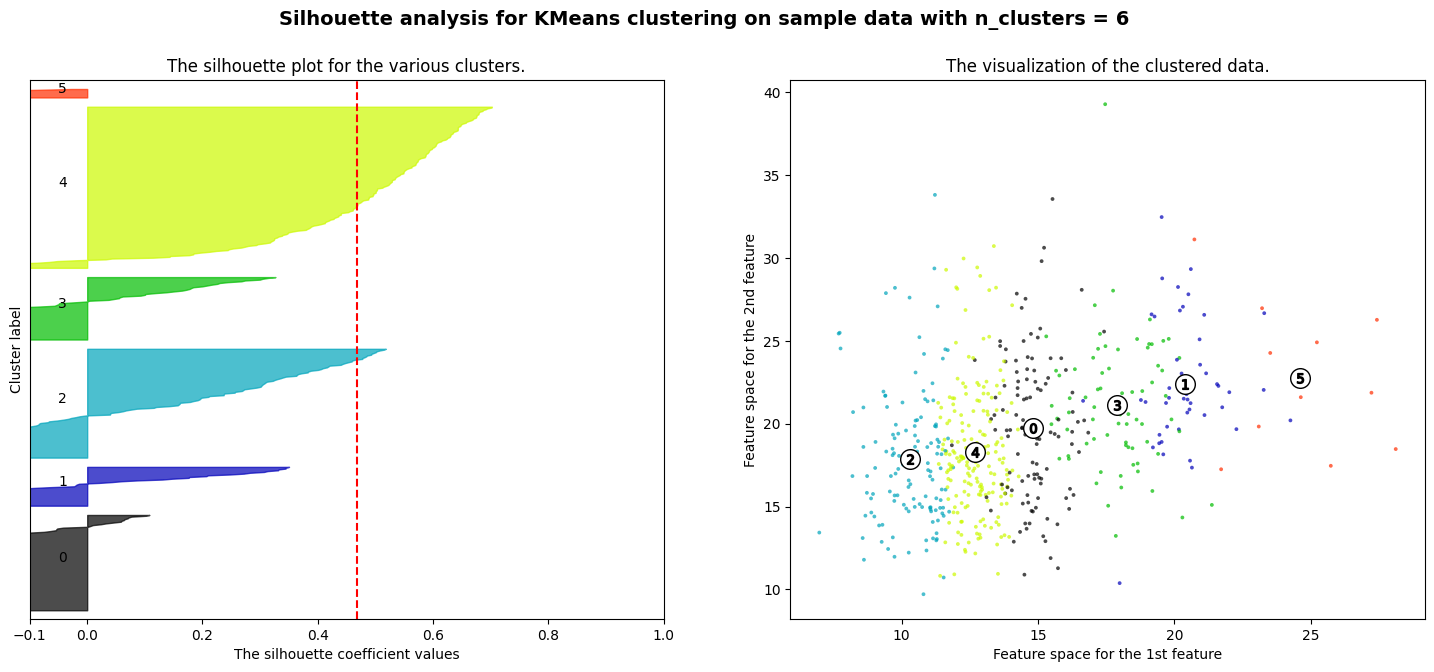

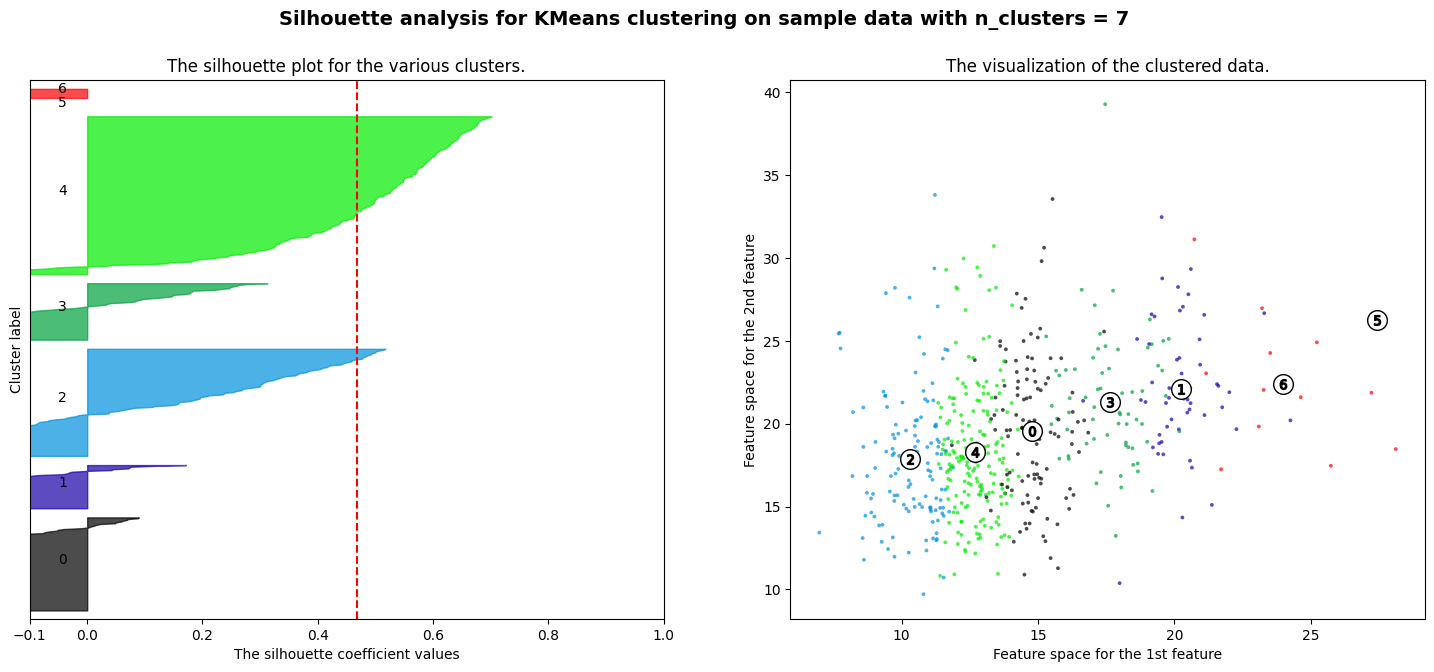

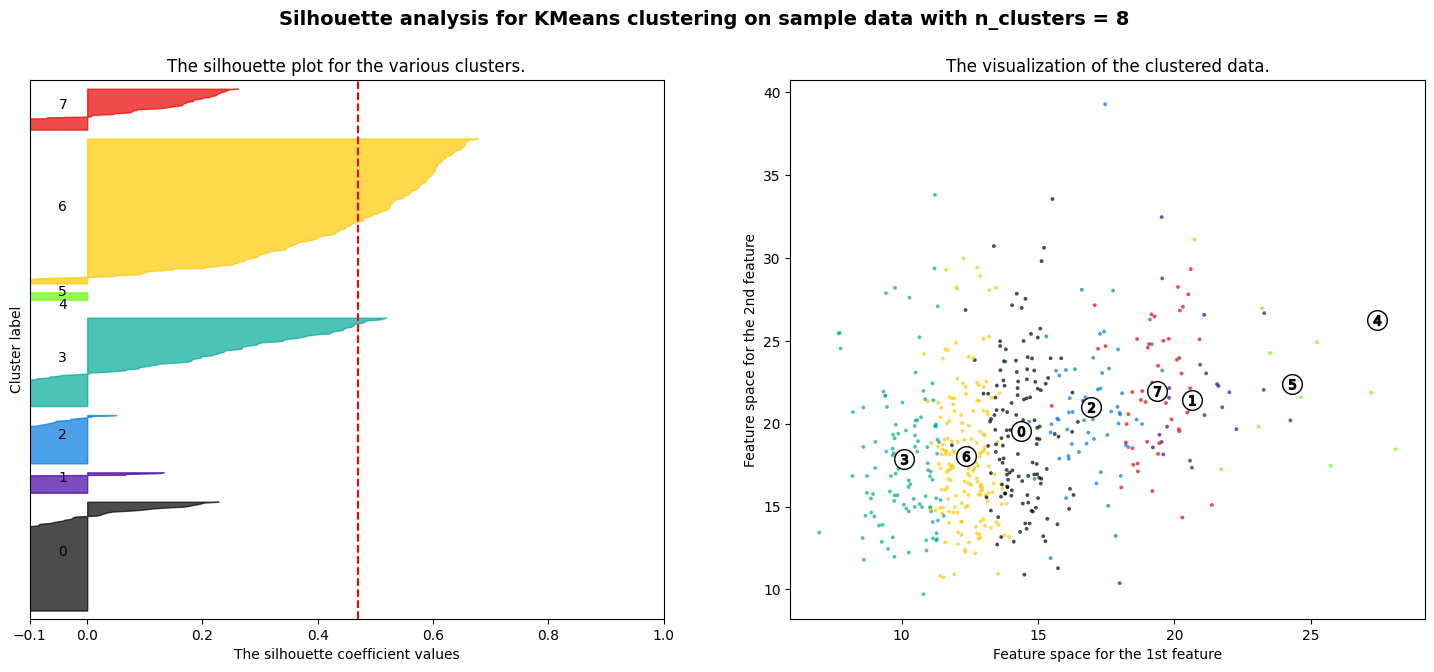

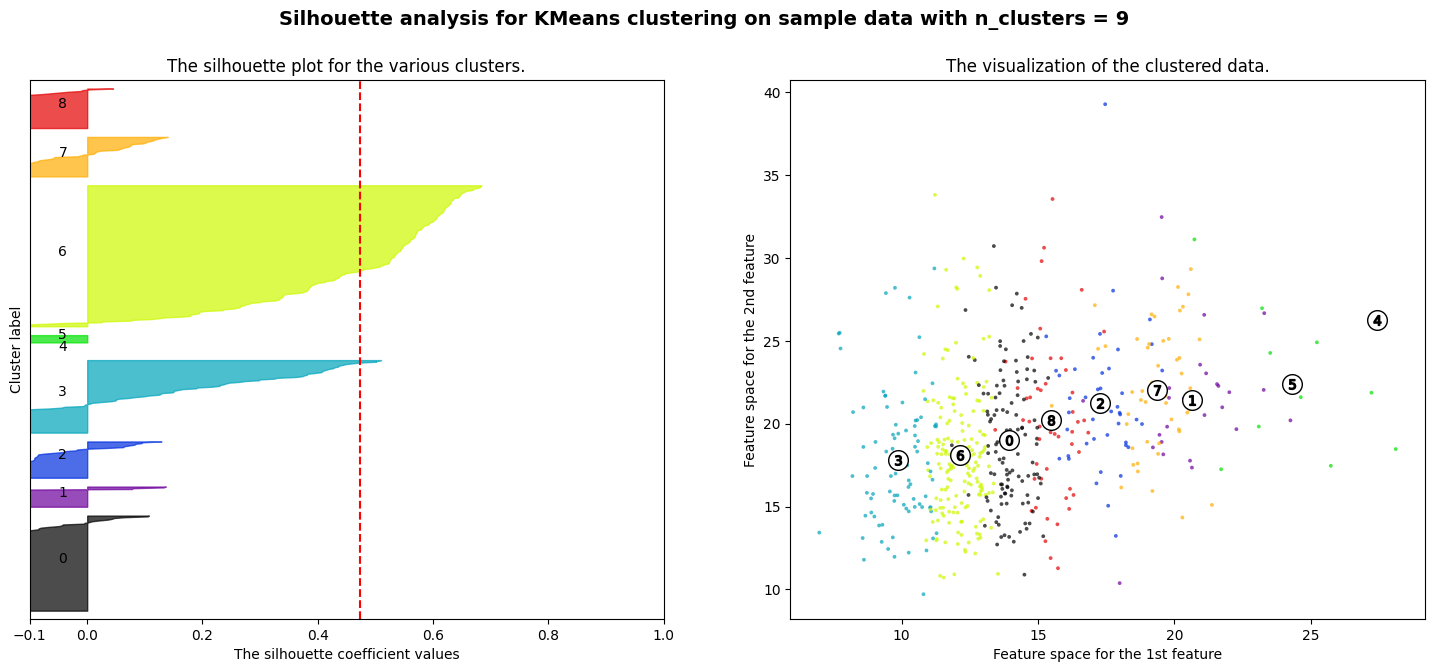

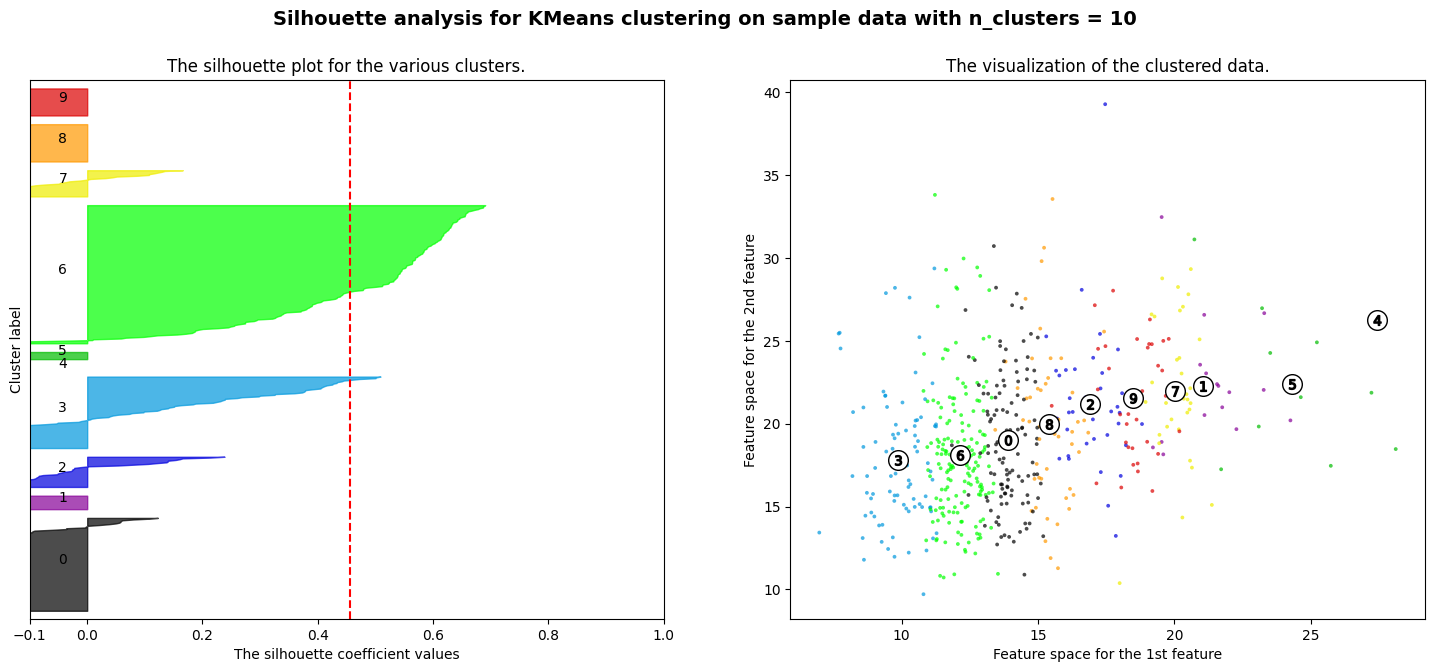

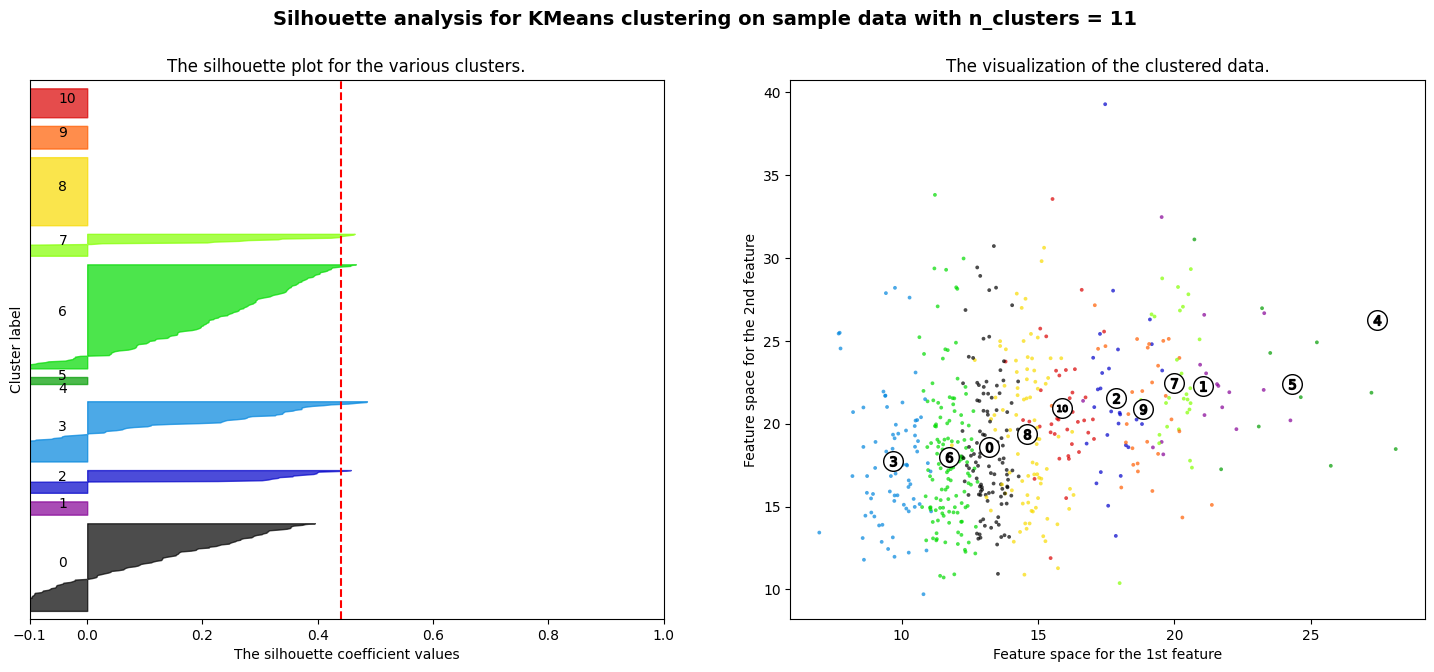

In [44]:


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels,metric='cosine')

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [45]:
KMeans??

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Source:        
class KMeans(_BaseKMeans):
    """K-Means clustering.

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------

    n_clusters : int, default=8
        The number of clusters to form as well as the number of
        centroids to generate.

        For an example of how to choose an optimal value for `n_clusters` refer to
        :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

    init : {'k-means++', 'random'}, callable or array-like of shape \
            (n_clusters, n_features), default='k-means++'
        Method for initialization:

        * 'k-means++' : selects initial cluster centroids using sampling \
            based on an empirical probability distribution of the points' \
            contribution to the ov